In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import tensorflow
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [27]:
df= pd.read_csv('/content/drive/MyDrive/spam.csv', encoding='latin-1')
df.shape

(5572, 5)

In [66]:
df.iloc[100:150,]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
100,ham,Okay name ur price as long as its legal! Wen c...,NaN,NaN,NaN
101,ham,I'm still looking for a car to buy. And have n...,NaN,NaN,NaN
102,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
103,ham,wow. You're right! I didn't mean to do that. I...,NaN,NaN,NaN
104,ham,Umma my life and vava umma love you lot dear,NaN,NaN,NaN
105,ham,Thanks a lot for your wishes on my birthday. T...,NaN,NaN,NaN
106,ham,"Aight, I'll hit you up when I get some cash",NaN,NaN,NaN
107,ham,How would my ip address test that considering ...,NaN,NaN,NaN
108,ham,I know! Grumpy old people. My mom was like you...,NaN,NaN,NaN
109,ham,Dont worry. I guess he's busy.,NaN,NaN,NaN


In [28]:
df['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [5]:
df=pd.get_dummies(df,columns=['v1'], drop_first=True)
df.head()

,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,v1_spam
0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,0
1,Ok lar... Joking wif u oni...,NaN,NaN,NaN,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,1
3,U dun say so early hor... U c already then say...,NaN,NaN,NaN,0
4,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,0


In [6]:
x= df['v2']
y=df['v1_spam']
voc_size = 5000

In [7]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
ps = PorterStemmer()
corpus =[]


for i in range(0, len(x)):
    #print(i)
    review = re.sub('[^a-zA-Z]', ' ', x[i])
    # Here, i am replacing every character with a blank space other than the characters a -z and A - Z in the column title
    review = review.lower()  # Making every letters to small letters
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [79]:
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

In [10]:
onehot_rep= [one_hot(words, voc_size, ) for words in corpus]

In [11]:
a=[]
for i in range(len(onehot_rep)):
  b=len(onehot_rep[i])
  a.append(b)

len(a)

5572

In [12]:
for i in range(len(a)):
  if a[i]==max(a):
    index=i

index

2433

In [13]:
a[2433]

77

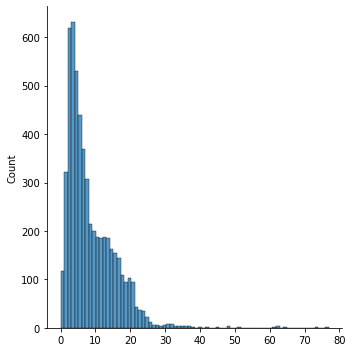

In [14]:
import seaborn as sns
sns.displot(a)

In [15]:
# Since most of the words are between 0 to 40, i have taken 25 as the sentence length

In [16]:
sentence_length = 25
embedded_docs = pad_sequences(onehot_rep, padding = 'pre', maxlen= sentence_length)
embedded_docs.shape

(5572, 25)

In [17]:
embedded_docs[89].shape

(25,)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras import optimizers

In [32]:
embedding_vector_features = 80

model = Sequential()
model.add(Embedding(voc_size,embedding_vector_features, input_length = sentence_length))
model.add(Dropout(0.2))
model.add(LSTM(units=80, activation='relu', kernel_initializer='he_normal',bias_initializer='he_uniform', dropout=0.3, recurrent_dropout=0.4))
model.add(Dense(100,activation='relu', kernel_initializer='he_normal',bias_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4), metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 25, 80)            400000    
                                                                 
 dropout_2 (Dropout)         (None, 25, 80)            0         
                                                                 
 lstm_1 (LSTM)               (None, 80)                51520     
                                                                 
 dense_2 (Dense)             (None, 100)               8100      
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 459,721
Trainable params: 459,721
Non-tr

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(embedded_docs, y, test_size =0.2, random_state =23)
x_train, x_valid, y_train, y_valid =train_test_split(x_train, y_train, random_state =23)

In [21]:
x_train.shape, y_train.shape

((3342, 25), (3342,))

In [23]:
from tensorflow import keras

In [31]:
del model

In [29]:
checkpoint_callbacks = keras.callbacks.ModelCheckpoint('Spam.h5', save_best_only=True)

In [33]:
model_history=model.fit(x_train, y_train, validation_data = (x_valid, y_valid), epochs =30, 
          callbacks=[checkpoint_callbacks])

Epoch 1/30
105/105 [==============================] - 15s 119ms/step - loss: 0.6474 - accuracy: 0.6185 - val_loss: 0.4706 - val_accuracy: 0.8601
Epoch 2/30
105/105 [==============================] - 12s 115ms/step - loss: 0.3348 - accuracy: 0.8639 - val_loss: 0.2892 - val_accuracy: 0.8601
Epoch 3/30
105/105 [==============================] - 12s 114ms/step - loss: 0.2858 - accuracy: 0.8645 - val_loss: 0.2783 - val_accuracy: 0.8601
Epoch 4/30
105/105 [==============================] - 18s 175ms/step - loss: 0.2643 - accuracy: 0.8677 - val_loss: 0.2577 - val_accuracy: 0.8628
Epoch 5/30
105/105 [==============================] - 14s 137ms/step - loss: 0.2442 - accuracy: 0.8836 - val_loss: 0.2231 - val_accuracy: 0.9175
Epoch 6/30
105/105 [==============================] - 13s 119ms/step - loss: 0.2198 - accuracy: 0.9084 - val_loss: 0.2128 - val_accuracy: 0.9614
Epoch 7/30
105/105 [==============================] - 16s 151ms/step - loss: 0.1904 - accuracy: 0.9393 - val_loss: 0.1759 - val_ac

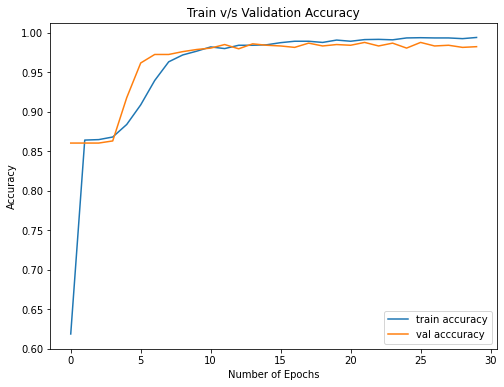

In [36]:
pd.DataFrame({'train accuracy': model_history.history['accuracy'], 
                  'val acccuracy': model_history.history['val_accuracy']}).plot(figsize=(8,6),
                   title ='Train v/s Validation Accuracy', xlabel='Number of Epochs',
                                                           ylabel='Accuracy')

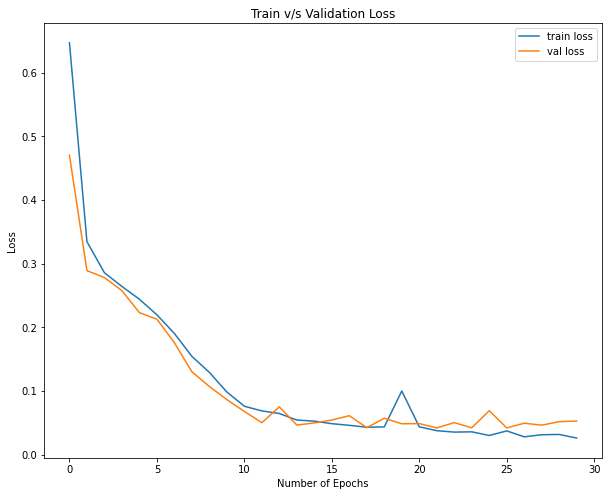

In [37]:
pd.DataFrame({'train loss':model_history.history['loss'], 
                  'val loss': model_history.history['val_loss']}).plot(figsize=(10,8),
                    title ='Train v/s Validation Loss', xlabel='Number of Epochs',
                                                           ylabel='Loss')

In [49]:
model.evaluate(x_test,y_test)

35/35 [==============================] - 1s 15ms/step - loss: 0.0616 - accuracy: 0.9839


[0.06157620623707771, 0.9838564991950989]

In [50]:
from sklearn.metrics import precision_score, accuracy_score,f1_score, confusion_matrix

In [41]:
model.predict(x_test).round()

array([[0.],
       [0.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [69]:
acc=accuracy_score(model.predict(x_train).round(), y_train)
precision=precision_score(model.predict(x_train).round(), y_train)
f1=f1_score(model.predict(x_train).round(), y_train)
print('Train Accuracy : ', str(acc*100))
print('Train Precision : ', str(precision*100))
print('Train F1 Score : ', str(f1*100))

Train Accuracy :  99.49132256134051
Train Precision :  97.36263736263736
Train F1 Score :  98.11738648947951


In [92]:
confusion_matrix(model.predict(x_train).round(), y_train)

array([[2882,   12],
       [   5,  443]])

In [54]:
acc=accuracy_score(model.predict(x_test).round(), y_test)
precision=precision_score(model.predict(x_test).round(), y_test)
f1=f1_score(model.predict(x_test).round(), y_test)
print('Test Accuracy : ', str(acc*100))
print('Test Precision : ', str(precision*100))
print('Test F1 Score : ', str(f1*100))

Test Accuracy :  98.38565022421525
Test Precision :  91.17647058823529
Test F1 Score :  93.23308270676691


In [48]:
confusion_matrix(model.predict(x_test).round(), y_test)

# for spam, the label is 1 and for ham, the label is 0

array([[973,  12],
       [  6, 124]])

In [ ]:
m.evaluate(x_test,y_test)

35/35 [==============================] - 1s 15ms/step - loss: 0.0764 - accuracy: 0.9812


[0.07644146680831909, 0.9811659455299377]

In [88]:
def prepro(message):
    review0 = re.sub('[^a-zA-Z]', ' ', message)
    review1 = review0.lower() 
    review2 = review1.split()
    review3 = [ps.stem(word) for word in review2 if not word in stopwords.words('english')]
    review4 = ' '.join(review3)           
    onehot= one_hot(review4, voc_size)
    onehot=np.reshape(onehot,(1,len(onehot)))
    embedded_docs = pad_sequences(onehot, padding = 'pre', maxlen= sentence_length)
    return embedded_docs

In [91]:
message=prepro(df['v2'][113])
model.predict(message).round().flatten()[0]==1

True

In [ ]:
import tensorflow as tf
del model
tf.keras.backend.clear_session()